In [4]:
pip install pandas numpy scikit-learn matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

column_names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']

train_data=pd.read_csv('train_data.txt',sep=' ::: ', engine='python', header=None, names=column_names)
test_data=pd.read_csv('test_data.txt',sep=' ::: ', engine='python', header=None, names=column_names)

print(train_data.head())
print(test_data.head())

   ID                             TITLE     GENRE  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         DESCRIPTION  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  
   ID                        TITLE  \
0   1         Edgar's Lunch (1998)   
1   2     La guerra de papá (1977)   
2   3  Off the Beaten Track (2010)   
3   4       Meu Amigo Hindu (2015)   
4   5            Er nu zhai (1955)   

                                               GENRE  DESCRIPTION  
0  L.R. Brane loves his life - his car, his apart...  

In [3]:
print(train_data.columns)
print(test_data.columns)
# print(test_data_solution.columns)

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')
Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')


In [10]:
print("Missing alues in train data : ",train_data.isnull().sum())

Missing alues in train data :  ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [12]:
import re
def clean_text(text):
    text = re.sub(r'\W',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text.strip().lower()

train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(clean_text)

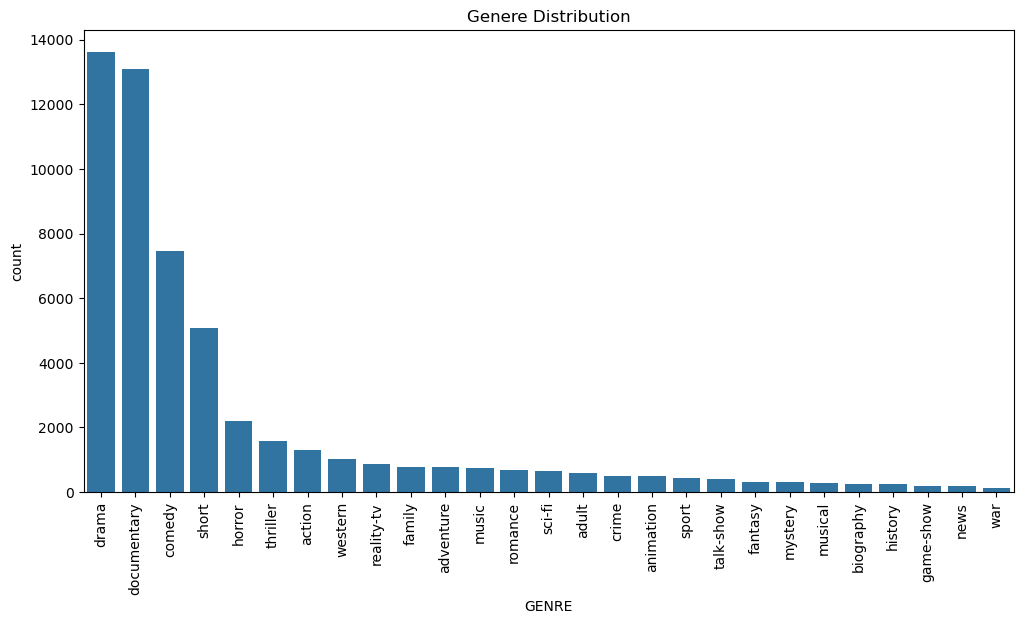

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='GENRE', data=train_data, order=train_data['GENRE'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Genere Distribution')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(max_features=5000)
X=tfidf_vectorizer.fit_transform(train_data['DESCRIPTION']).toarray()
y=train_data['GENRE']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
    X,y, random_state=42, test_size=0.2, stratify=y
)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.33588490270220417
              precision    recall  f1-score   support

      action       0.07      0.05      0.06       263
       adult       0.12      0.11      0.11       118
   adventure       0.09      0.08      0.08       155
   animation       0.01      0.01      0.01       100
   biography       0.00      0.00      0.00        53
      comedy       0.30      0.30      0.30      1490
       crime       0.04      0.03      0.03       101
 documentary       0.54      0.58      0.56      2619
       drama       0.39      0.43      0.41      2723
      family       0.06      0.04      0.05       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.24      0.23      0.24        39
     history       0.00      0.00      0.00        49
      horror       0.21      0.17      0.19       441
       music       0.21      0.21      0.21       146
     musical       0.04      0.04      0.04        55
     mystery       0.04      0.03    

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.41233975836945497
              precision    recall  f1-score   support

      action       0.17      0.15      0.16       263
       adult       0.36      0.23      0.28       118
   adventure       0.17      0.11      0.13       155
   animation       0.07      0.04      0.05       100
   biography       0.00      0.00      0.00        53
      comedy       0.31      0.22      0.25      1490
       crime       0.05      0.01      0.02       101
 documentary       0.55      0.66      0.60      2619
       drama       0.37      0.72      0.49      2723
      family       0.45      0.06      0.10       157
     fantasy       0.17      0.02      0.03        65
   game-show       0.82      0.59      0.69        39
     history       0.25      0.02      0.04        49
      horror       0.57      0.16      0.25       441
       music       0.60      0.21      0.31       146
     musical       0.00      0.00      0.00        55
     mystery       0.00      0.00      0.00    

In [31]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5100986811767961
              precision    recall  f1-score   support

      action       0.29      0.02      0.04       263
       adult       0.33      0.01      0.02       118
   adventure       0.60      0.02      0.04       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.50      0.39      0.44      1490
       crime       0.00      0.00      0.00       101
 documentary       0.56      0.90      0.69      2619
       drama       0.45      0.83      0.58      2723
      family       0.00      0.00      0.00       157
     fantasy       0.00      0.00      0.00        65
   game-show       1.00      0.03      0.05        39
     history       0.00      0.00      0.00        49
      horror       0.77      0.30      0.43       441
       music       0.82      0.06      0.11       146
     musical       0.00      0.00      0.00        55
     mystery       0.00      0.00      0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.165658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446366
[LightGBM] [Info] Number of data points in the train set: 43371, number of used features: 5000
[LightGBM] [Info] Start training from score -3.719098
[LightGBM] [Info] Start training from score -4.520567
[LightGBM] [Info] Start training from score -4.247827
[LightGBM] [Info] Start training from score -4.691094
[LightGBM] [Info] Start training from score -5.320960
[LightGBM] [Info] Start training from score -1.985224
[LightGBM] [Info] Start training from score -4.676131
[LightGBM] [Info] Start training from score -1.420609
[LightGBM] [Info] Start training from score -1.381946
[LightGBM] [Info] Start training from score -4.236600
[LightGBM] [Info] Start training from score -5.124587
[LightGBM] [Info] Start training from score -5.634121
[LightGBM] [Info] Start training from score -5.409688
[Ligh

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26], got ['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the genres
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Classes:", label_encoder.classes_)


Classes: ['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to genre labels
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.5438531771649913
              precision    recall  f1-score   support

      action       0.50      0.21      0.29       263
       adult       0.60      0.29      0.39       118
   adventure       0.47      0.15      0.23       155
   animation       0.42      0.13      0.20       100
   biography       0.00      0.00      0.00        53
      comedy       0.49      0.45      0.47      1490
       crime       0.44      0.08      0.13       101
 documentary       0.64      0.83      0.72      2619
       drama       0.50      0.76      0.60      2723
      family       0.46      0.08      0.13       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.74      0.51      0.61        39
     history       0.00      0.00      0.00        49
      horror       0.63      0.51      0.56       441
       music       0.55      0.40      0.46       146
     musical       0.67      0.07      0.13        55
     mystery       0.33      0.03      0.06 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
svm_model= SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm= svm_model.predict(X_test)

print('Accuracy score: ',accuracy_score(y_test,y_pred_svm))
print('Classification report: ',classification_report(y_test, y_pred_svm))